In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fifa = pd.read_csv('fifa.csv')
fifad = pd.read_csv('fifa_ variable_information.csv')

In [4]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#Drop unwanted columns

In [4]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [5]:
fifa = fifa.drop(['ID','Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',  'Preferred Foot',
            'Weak Foot', 'Skill Moves', 'Work Rate',
            'Body Type','Jersey Number', 'Loaned From',
             'Crossing', 'Finishing',
            'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
            'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 
            'GKReflexes'],axis = 1)

In [79]:
fifa.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,94,94,1105000000,565000,5.0,RF,2004,2021,5.70,159.0,226.500000
1,Cristiano Ronaldo,33,94,94,77000000,405000,5.0,ST,2018,2022,6.20,183.0,127.100000
2,Neymar Jr,26,92,93,1185000000,290000,5.0,LW,2017,2022,5.90,150.0,228.100000
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6.40,168.0,138.600000
4,K. De Bruyne,27,91,92,102000000,355000,4.0,RCM,2015,2023,5.11,154.0,196.400000


In [7]:
#Replace M , K and . 

In [8]:
fifa.Value = fifa.Value.apply(lambda x: x.replace('.',''))

In [9]:
fifa.Value = fifa.Value.apply(lambda x: x.replace('M','000000'))

In [10]:
fifa.Value = fifa.Value.apply(lambda x: x.replace('K','000'))

In [11]:
fifa.Wage = fifa.Wage.apply(lambda x: x.replace('K','000'))

In [12]:
#Remove €

In [13]:
fifa.Value = [x.strip('€') for x in fifa.Value]

In [14]:
fifa.Wage = [x.strip('€') for x in fifa.Wage]

In [15]:
#Convert to Integers [Values , Wage]

In [16]:
fifa['Value'] = fifa['Value'].astype(str).astype(int)

In [17]:
fifa['Wage'] = fifa['Wage'].astype(str).astype(int)

In [18]:
#Applying same to Release Clause

In [19]:
fifa['Release Clause'] = fifa['Release Clause'].astype(str)

In [20]:
fifa['Release Clause'] = [x[1:] for x in fifa['Release Clause']]

In [21]:
fifa['Release Clause'] = fifa['Release Clause'].str.replace('M','00000').str.replace('K','000')

In [22]:
fifa['Release Clause'] = fifa['Release Clause'].str.replace('an','0')

In [23]:
fifa['Release Clause'].isnull().sum()

0

In [24]:
#Height and weight

In [25]:
fifa['Height'] = fifa['Height'].astype(str)

In [26]:
fifa['Weight'] = fifa['Weight'].astype(str)

In [27]:
fifa.Height = fifa.Height.apply(lambda x: x.replace("'",'.'))

In [28]:
fifa.Weight = fifa.Weight.apply(lambda x: x.replace("lbs",''))

In [29]:
fifa['Height'] = fifa['Height'].astype(float)

In [30]:
fifa['Weight'] = fifa['Weight'].astype(float)

In [31]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 13 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null int32
Wage                        18207 non-null int32
International Reputation    18159 non-null float64
Position                    18147 non-null object
Joined                      16654 non-null object
Contract Valid Until        17918 non-null object
Height                      18159 non-null float64
Weight                      18159 non-null float64
Release Clause              18207 non-null object
dtypes: float64(3), int32(2), int64(3), object(5)
memory usage: 1.7+ MB


In [32]:
fifa.isnull().sum()

Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
International Reputation      48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause                 0
dtype: int64

In [ ]:
# Joined

In [33]:
import datetime
fifa['Joined'] =  pd.to_datetime(fifa['Joined'])

In [37]:
fifa['Joined'] = fifa['Joined'].astype(str)

In [38]:
fifa['Joined'] = fifa['Joined'].replace('NaT',0)

In [39]:
fifa['Joined'] = [x[0:4] for x in fifa['Joined']]


In [40]:
fifa['Joined'] = fifa['Joined'].astype(int)

In [41]:
fifa['Joined'].median()

2017.0

In [42]:
fifa['Joined'] = fifa['Joined'].replace(0,fifa['Joined'].median())

In [43]:
fifa['Joined'].value_counts()

2018    6569
2017    5860
2016    2246
2015    1336
2014     818
2013     458
2012     340
2011     201
2010     131
2009      78
2008      53
2007      38
2006      18
2005      17
2003      13
2004      12
2002      10
1998       3
2001       2
2000       2
1999       1
1991       1
Name: Joined, dtype: int64

In [44]:
#Contract Valid I=Until

In [45]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])

In [50]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(str)

In [51]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].replace('NaT',0)

In [52]:
fifa['Contract Valid Until'] = [x[0:4] for x in fifa['Contract Valid Until']]

In [53]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(int)

In [54]:
fifa['Contract Valid Until'].median()

2020.0

In [55]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].replace(0,fifa['Contract Valid Until'].median())

In [56]:
fifa['Contract Valid Until'].value_counts()

2019    5920
2021    4360
2020    4333
2022    1477
2023    1053
2018    1032
2024      23
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

In [57]:
#Plot Distribution

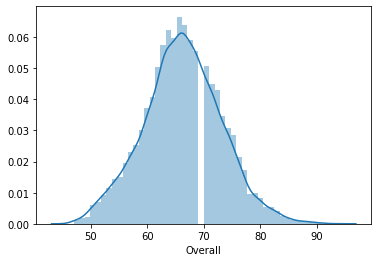

In [58]:
sns.distplot(fifa['Overall'], hist = True)

In [291]:
#Generate pair plots for the following variables:
###Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
list1 = ['Overall', 'Value', 'Wage', 'International Reputation', 'Weight', 'Release Clause']

In [ ]:
sns.pairplot(fifa[list1])

In [ ]:
 #table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [61]:
list2 = ['Overall','Contract Valid Until']

In [63]:
a = fifa[fifa['Contract Valid Until']==2020]

In [76]:
a.sort_values(by='Overall', ascending=False, axis = 0).head(20)

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6.40,168.0,138.600000
6,L. Modrić,32,91,91,67000000,420000,4.0,RCM,2012,2020,5.80,146.0,137.400000
8,Sergio Ramos,32,91,91,51000000,380000,4.0,RCB,2005,2020,6.00,181.0,104.600000
5,E. Hazard,27,91,91,93000000,340000,4.0,LF,2012,2020,5.80,163.0,172.100000
13,David Silva,32,90,90,60000000,285000,4.0,LCM,2010,2020,5.80,148.0,11100000
21,E. Cavani,31,89,89,60000000,200000,4.0,LS,2013,2020,6.10,170.0,11100000
24,G. Chiellini,33,89,89,27000000,215000,4.0,LCB,2005,2020,6.20,187.0,44.600000
31,C. Eriksen,26,88,91,735000000,205000,3.0,CAM,2013,2020,5.11,168.0,141.500000
39,Thiago Silva,33,88,88,24000000,165000,4.0,RCB,2012,2020,6.00,181.0,44.400000
50,D. Mertens,31,87,87,45000000,135000,3.0,RF,2013,2020,5.70,134.0,76.500000


In [65]:
x = a['Wage'].mean()
print(x)

8743.13408723748


In [66]:
y = a['Age'].mean()
print(y)

25.273482575582737


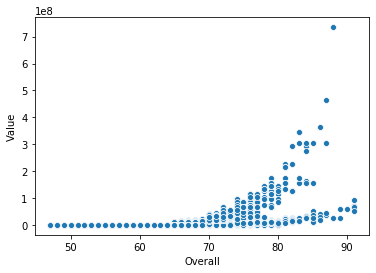

In [68]:
sns.scatterplot(x='Overall', y ='Value', data = a)

In [69]:
b = ['Overall','Value']
a[b].corr()

,Overall,Value
Overall,1.000000,0.520258
Value,0.520258,1.000000


In [ ]:
#tables containing the top 5 players by Overall rating for each unique position

In [71]:
g = fifa.groupby(["Position"]).apply(lambda x: x.sort_values(["Overall"], ascending = False)).reset_index(drop=True)

In [72]:
g.groupby('Position').head(5)

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,A. Griezmann,27,89,90,78000000,145000,4.0,CAM,2014,2023,5.90,161.0,165.800000
1,C. Eriksen,26,88,91,735000000,205000,3.0,CAM,2013,2020,5.11,168.0,141.500000
2,Roberto Firmino,26,86,87,53000000,195000,3.0,CAM,2015,2023,5.11,168.0,104.700000
3,T. Müller,28,86,86,45000000,135000,4.0,CAM,2008,2021,6.10,165.0,74.300000
4,M. Özil,29,86,86,435000000,190000,4.0,CAM,2013,2021,5.11,168.0,82.700000
958,D. Godín,32,90,90,44000000,125000,3.0,CB,2010,2019,6.20,172.0,90.200000
959,S. Umtiti,24,87,92,57000000,205000,3.0,CB,2016,2023,6.00,165.0,121.100000
960,M. Benatia,31,86,86,30000000,160000,3.0,CB,2014,2020,6.20,207.0,49.500000
961,N. Otamendi,30,85,85,285000000,170000,3.0,CB,2015,2022,6.00,179.0,52.700000
962,Naldo,35,85,85,9000000,38000,3.0,CB,2016,2020,6.60,201.0,15.300000


In [82]:
fifa['Joined'].dtype

dtype('int32')